Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, make_scorer 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/heart.csv') #import the dataset

In [ ]:
df.head() #reading the imported dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe() #describe each feature

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum() #checking for null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.corr() #pairwise correlation of columns in the data set

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


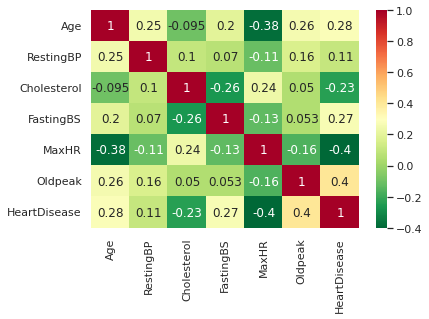

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn_r"); #see which variables have strong relationships with which variables

In [ ]:
#Heart Disease Distribution
labels=['False', 'True']
values= df["HeartDisease"].value_counts().values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values= values, hole=.4,
               marker = dict(colors = ['48D1CC', 'FA8072'], line=dict(color='white', width=2)),
               textfont_size=18)], layout = go.Layout(title = 'Heart Disease')
               )
               
fig.show()

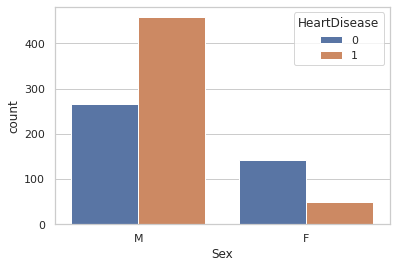

In [ ]:
# Distribution of heart disease based on Sex
sns.countplot(data = df, x = 'Sex', hue='HeartDisease');

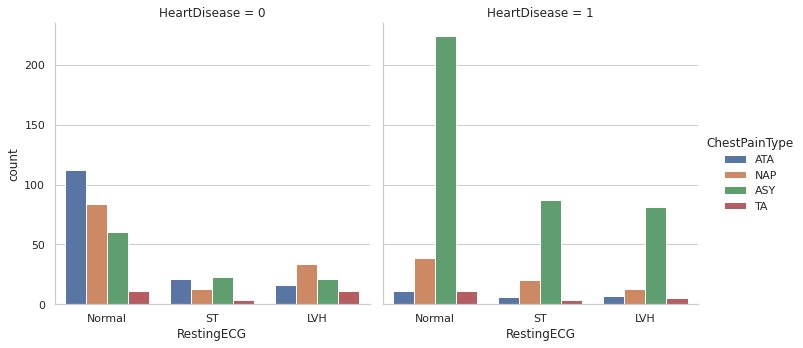

In [ ]:
# Distribution of Heart Disease based on Resting ECG and Chest Pain Type
sns.catplot(data = df, x = 'RestingECG', hue = 'ChestPainType', col = 'HeartDisease', kind = 'count');

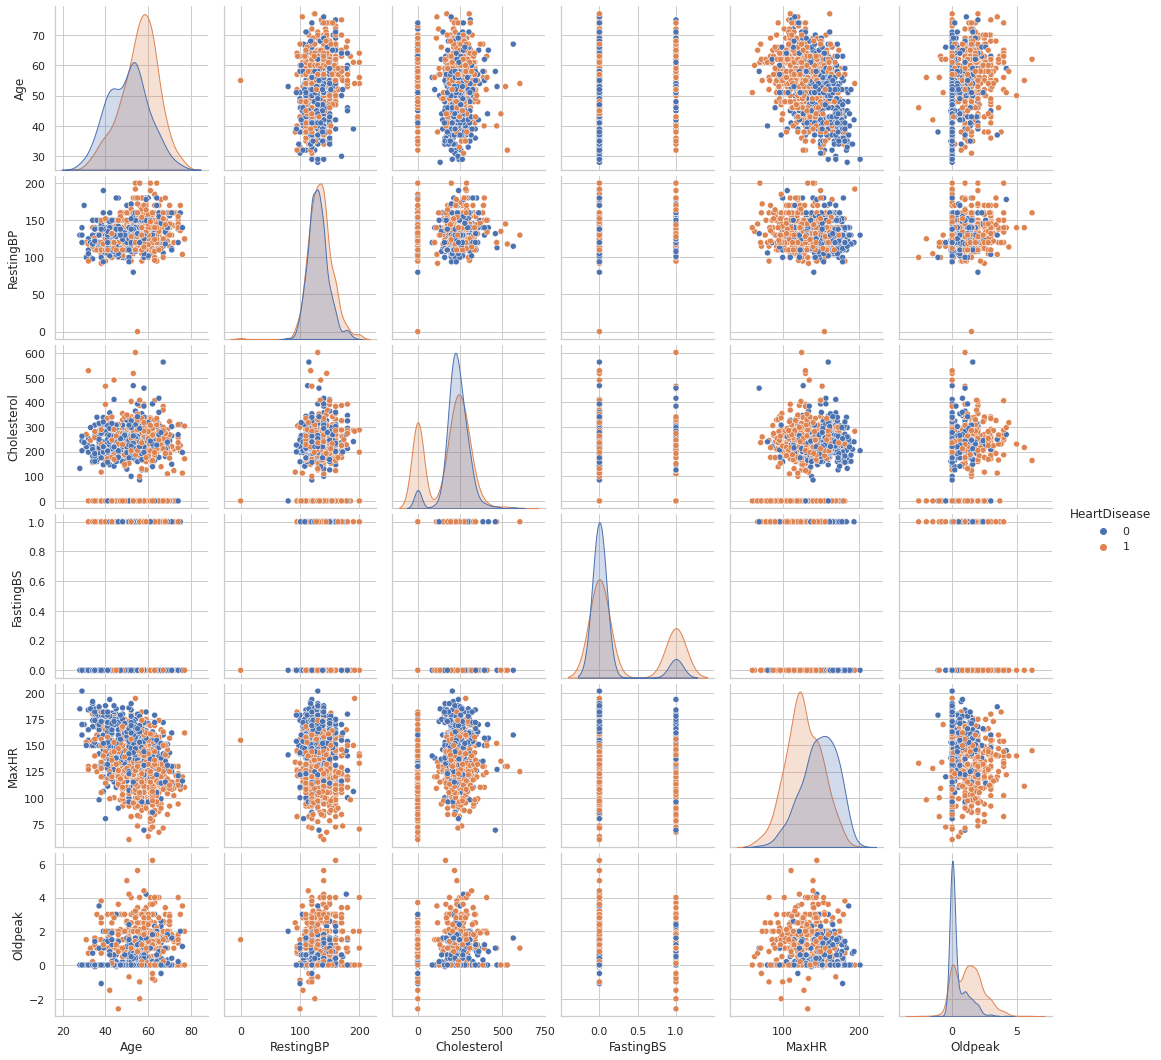

In [ ]:
# Pairwise graphical analysis of numerical variables
plot_cols =  list(df.select_dtypes(include = ['float64', 'int64']))

sns.pairplot(df[plot_cols], diag_kind = 'kde', hue = 'HeartDisease')


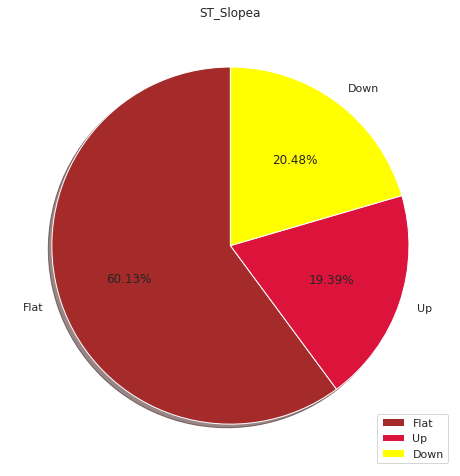

In [ ]:
ST_Slope_label = ['Flat','Up','Down']
ST_Slope_size = [552, 178, 188]
ST_Slope_explode = (0, 0, 0)
plt.figure(figsize=(8,9))
plt.pie( ST_Slope_size , explode=ST_Slope_explode , labels=ST_Slope_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['brown', 'crimson','yellow'])
plt.title("ST_Slopea")
plt.legend()

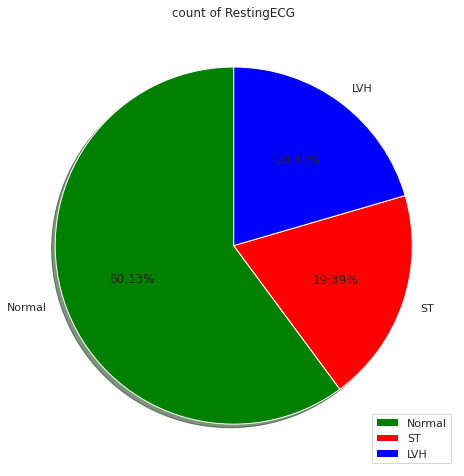

In [ ]:
RestingECG_label = ['Normal', 'ST', 'LVH']
RestingECG_size = [552, 178, 188]
RestingECG_explode = (0, 0, 0)
plt.figure(figsize=(8,9))
plt.pie( RestingECG_size , explode=RestingECG_explode , labels=RestingECG_label ,shadow=True ,
        autopct='%1.2f%%' , startangle=90, colors=['green', 'red', 'blue'])
plt.title("count of RestingECG")
plt.legend()

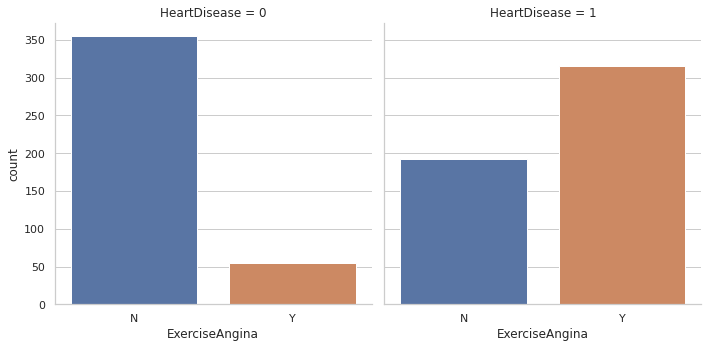

In [ ]:
# Distribution of Heart Disease based Exercise Angina
sns.catplot(data = df, x = 'ExerciseAngina', col = 'HeartDisease', kind = 'count');

### 1) Linear Regression (selected features - continuous variables)

In [ ]:
X = df[['Age','RestingBP', 'Cholesterol', 'MaxHR']]
y = df['HeartDisease']

In [ ]:
scaler = StandardScaler() #standardization
X[['Age','RestingBP', 'Cholesterol', 'MaxHR']] = scaler.fit_transform(X[['Age','RestingBP', 'Cholesterol', 'MaxHR']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #splitting

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
# actual and predicted values
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
306,1,0.508764
711,0,0.434781
298,1,0.892722
466,1,0.714042
253,0,0.458906


Linear regression on continuous variables is not a good model for this data as seen from above table of actual and predicted values of whether the population have heart disease.

In [ ]:
# to test accuracy of linear regression model
lr_r2 = r2_score(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred) ** 0.5
lr_mae = mean_absolute_error(y_test, y_pred)
print('Linear regression R2 score: ' + str(lr_r2) + '\nLinear regression mean root squared error: ' + str(lr_rmse) + '\nLinear regression mean absolute error: ' + str(lr_mae))

Linear regression R2 score: 0.10859360203046409
Linear regression mean root squared error: 0.46856039750346246
Linear regression mean absolute error: 0.41587425688705254


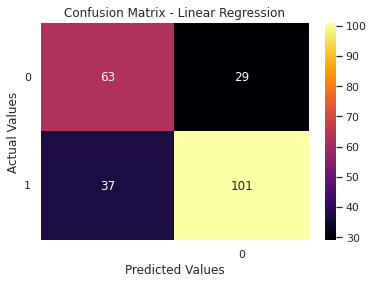

<Figure size 720x432 with 0 Axes>

In [ ]:
# confusion matrix to see if actual values and predicted values match
y_pred_labels = np.where(y_pred > 0.5, 1, 0)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_labels)
confusion_matrix_lr_df = pd.DataFrame(confusion_matrix_lr)
labels = y.unique()

ax = plt.axes()
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_lr_df, annot=True, fmt="g", ax=ax, cmap="inferno")
ax.set_title('Confusion Matrix - Linear Regression')
ax.set_xlabel("Predicted Values")
ax.set_xticklabels(['']+list(labels))
ax.set_ylabel("Actual Values")
ax.set_yticklabels(list(labels), rotation=0)
plt.show();

### 2) Decision Tree Regression

In [ ]:
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

In [ ]:
dt_r2 = r2_score(y_test, y_pred_dtree)
print('Decision Tree R2 score: '+ str(dt_r2))

Decision Tree R2 score: -0.3224637681159419


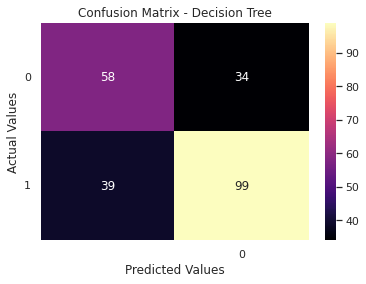

<Figure size 720x432 with 0 Axes>

In [ ]:
# confusion matrix to see if actual values and predicted values match

confusion_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
confusion_matrix_dtree_df = pd.DataFrame(confusion_matrix_dtree)
labels = y.unique()

ax = plt.axes()
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_dtree_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted Values")
ax.set_xticklabels(['']+list(labels))
ax.set_ylabel("Actual Values")
ax.set_yticklabels(list(labels), rotation=0)
plt.show();

### 3) Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

In [ ]:
rf_r2 = r2_score(y_test, y_rf_pred)
print('Random Forest R2 score: '+ str(rf_r2))

Random Forest R2 score: 0.17372101449275368


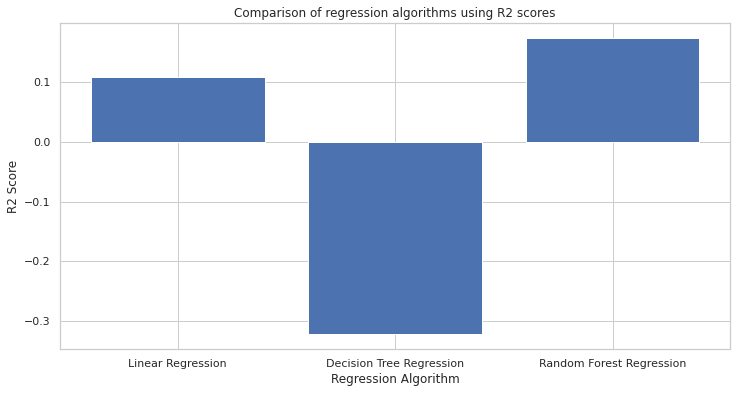

In [ ]:
# Comparison of regression algorithms using R2 scores
x = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
y = [lr_r2, dt_r2, rf_r2]

plt.figure(figsize=(12,6))
plt.bar(x, y)
plt.title('Comparison of regression algorithms using R2 scores')
plt.xlabel('Regression Algorithm')
plt.ylabel('R2 Score')
plt.show();

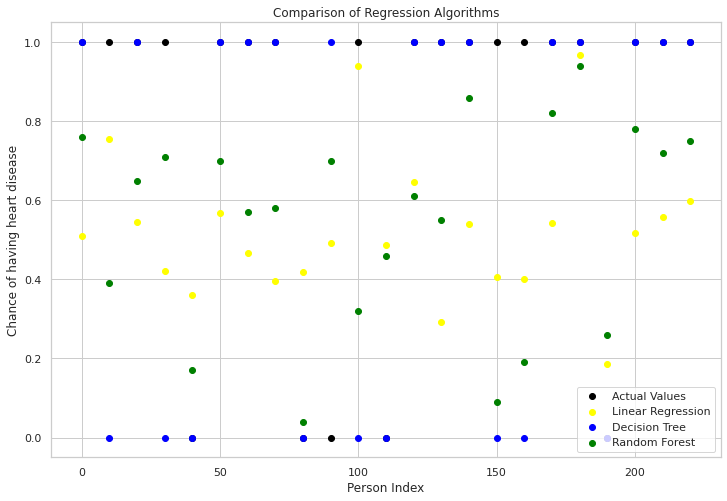

In [ ]:
# comparison of regression algorithms

plt.figure(figsize=(12,8))
black = plt.scatter(np.arange(0,230,10), y_test[0::10], color='black')
yellow = plt.scatter(np.arange(0,230,10), y_pred[0::10], color='yellow')
blue = plt.scatter(np.arange(0,230,10), y_pred_dtree[0::10], color='blue')
green = plt.scatter(np.arange(0,230,10), y_rf_pred[0::10], color='green')
plt.title('Comparison of Regression Algorithms')
plt.xlabel('Person Index')
plt.ylabel('Chance of having heart disease')
plt.legend((black, yellow, blue, green), ('Actual Values', 'Linear Regression', 'Decision Tree', 'Random Forest'))
plt.show();

### 4) Naive Bayes 


In [ ]:
#Encoding categorical variables

ChestPainType_le = LabelEncoder()
RestingECG_le = LabelEncoder()
ExerciseAngina_le = LabelEncoder()
ST_Slope_le = LabelEncoder()
Sex_le = LabelEncoder()
df['ChestPainType'] = ChestPainType_le.fit_transform(df['ChestPainType'])
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ExerciseAngina'])
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])
df['Sex'] = Sex_le.fit_transform(df['Sex'])

In [ ]:
#Split and test data
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [ ]:
#Scale numerical variables
std_scaler = StandardScaler()
std_scaler.fit(x)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=x.columns)
X_test = pd.DataFrame(X_test_std, columns=x.columns)

In [ ]:
#Fitting the model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)[:, 1] 
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [ ]:
#Model performance metrics

print('Gaussian Naive Bayes')
print('\nClassification report:\n', classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))
print('\nModel accuracy:\n', accuracy_score(y_test, y_pred))
print('\nArea under the curve:\n', auc(fpr, tpr))

Gaussian Naive Bayes

Classification report:
                   precision    recall  f1-score   support

No Heart Disease       0.75      0.87      0.80        76
   Heart Disease       0.90      0.80      0.84       108

        accuracy                           0.83       184
       macro avg       0.82      0.83      0.82       184
    weighted avg       0.84      0.83      0.83       184


Model accuracy:
 0.8260869565217391

Area under the curve:
 0.90338693957115


Text(0.5, 1.0, 'Gaussian Naive Bayes - ROC Curve')

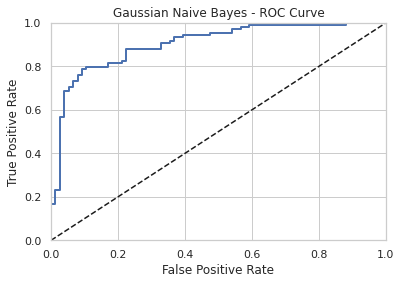

In [ ]:
#Plot ROC Curve


plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gaussian Naive Bayes - ROC Curve')

In [ ]:
#Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)

Text(0.5, 45.79999999999998, 'Predicted label')

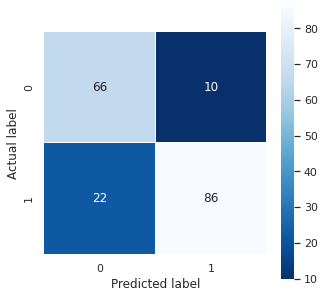

In [ ]:
plt.figure(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidths =.5, fmt = 'd', square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

### 5) Support Vector Classifer

In [ ]:
#Fitting the model

svc_rbf = SVC(kernel='rbf', gamma = 0.1, probability=True)
svc_rbf.fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)
y_pred_proba = svc_rbf.predict_proba(X_test)[:, 1] 
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [ ]:
#Model performance metrics

print('SVM')
print('\nClassification report:\n', classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))
print('\nModel accuracy:\n', accuracy_score(y_test, y_pred))
print('\nArea under the curve:\n', auc(fpr, tpr))

SVM

Classification report:
                   precision    recall  f1-score   support

No Heart Disease       0.77      0.83      0.80        76
   Heart Disease       0.87      0.82      0.85       108

        accuracy                           0.83       184
       macro avg       0.82      0.83      0.82       184
    weighted avg       0.83      0.83      0.83       184


Model accuracy:
 0.8260869565217391

Area under the curve:
 0.9237329434697856


Text(0.5, 1.0, 'Support Vector Classifier - RBF ROC Curve')

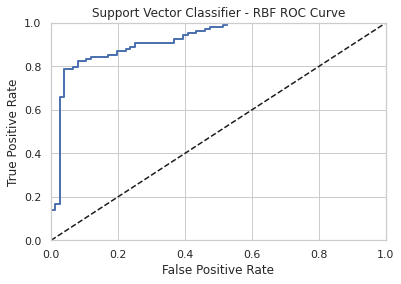

In [ ]:
#Plot ROC Curve

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Classifier - RBF ROC Curve')

Text(0.5, 45.79999999999998, 'Predicted label')

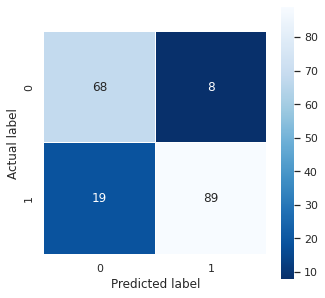

In [ ]:
#Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidths =.5, fmt = 'd', square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

### 6) K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train , y_train)
KNeighborsClassifier(n_neighbors=10)
knn.score(X_train , y_train)

0.8433242506811989

In [ ]:
print('KNN')
print('\nClassification report:\n', classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))
print('\nModel accuracy:\n', accuracy_score(y_test, y_pred))
print('\nArea under the curve:\n', auc(fpr, tpr))

KNN

Classification report:
                   precision    recall  f1-score   support

No Heart Disease       0.77      0.83      0.80        76
   Heart Disease       0.87      0.82      0.85       108

        accuracy                           0.83       184
       macro avg       0.82      0.83      0.82       184
    weighted avg       0.83      0.83      0.83       184


Model accuracy:
 0.8260869565217391

Area under the curve:
 0.9237329434697856


Text(0.5, 1.0, 'KNN ROC Curve')

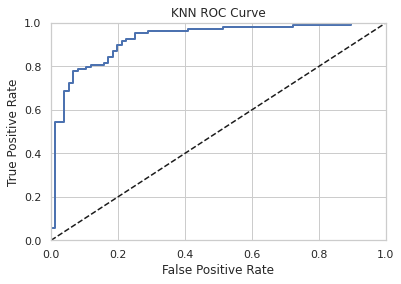

In [ ]:
#Plot ROC Curve

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')

Text(0.5, 45.79999999999998, 'Predicted label')

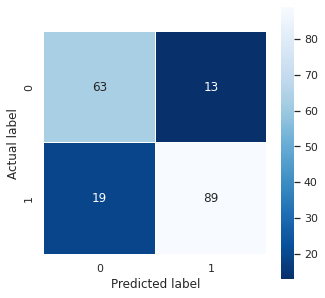

In [ ]:
#Plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidths =.5, fmt = 'd', square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

### 7) XGBoost

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_jobs = -1, early_stopping_rounds = 10, 
                    eval_metric = 'aucpr', eval_set = [(X_test, y_test)], random_state = 42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1] 
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

In [ ]:
print('XGBoost')
print('\nClassification report:\n', classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))
print('\nModel accuracy:\n', accuracy_score(y_test, y_pred))
print('\nArea under the curve:\n', auc(fpr, tpr))

XGBoost

Classification report:
                   precision    recall  f1-score   support

No Heart Disease       0.77      0.83      0.80        76
   Heart Disease       0.87      0.82      0.85       108

        accuracy                           0.83       184
       macro avg       0.82      0.83      0.82       184
    weighted avg       0.83      0.83      0.83       184


Model accuracy:
 0.8260869565217391

Area under the curve:
 0.9237329434697856


Text(0.5, 1.0, 'XGBoost - ROC Curve')

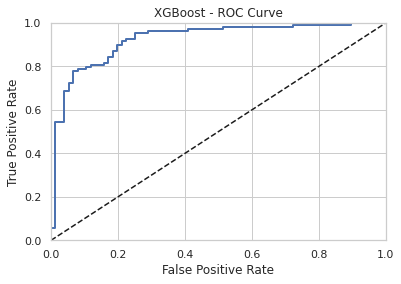

In [ ]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')

Text(0.5, 45.79999999999998, 'Predicted label')

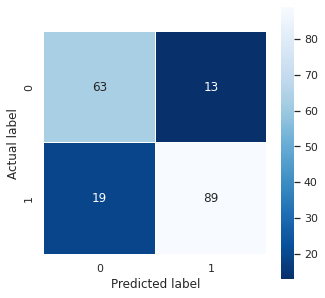

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize =(5,5))
sns.heatmap(cm, annot =True, linewidths =.5, fmt = 'd', square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Hyperparamteter tuning using GridSearch
xgb = XGBClassifier(random_state = 42)

param_grid_xgb = {
    'learning_rate': [.05, .01, .1], 
    'gamma' : [0, .25, 1],
    'max_depth': [3, 4, 5, 6],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [1, 3, 5]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [ ]:
def grid_search_xgb(refit_score='recall_score'):
    grid_search = GridSearchCV(xgb, param_grid_xgb, scoring=scorers, refit=refit_score,
                           cv=10, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)
    print('\nClassification report:\n', classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease']))
    print('\nModel accuracy:\n', accuracy_score(y_test, y_pred))
    print('\nArea under the curve:\n', auc(fpr, tpr))

    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['No Heart Disease', 'Heart Disease'], index=['No Heart Disease', 'Heart Disease']))
    return grid_search

In [ ]:
#Choosing the recall score to chose the best estimator to reduce False Negatives.

grid_search_xgb(refit_score='recall_score')

Best params for recall_score
{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 1, 'scale_pos_weight': 5}

Classification report:
                   precision    recall  f1-score   support

No Heart Disease       0.88      0.61      0.72        76
   Heart Disease       0.77      0.94      0.85       108

        accuracy                           0.80       184
       macro avg       0.83      0.77      0.78       184
    weighted avg       0.82      0.80      0.80       184


Model accuracy:
 0.8043478260869565

Area under the curve:
 0.9237329434697856
                  No Heart Disease  Heart Disease
No Heart Disease                46             30
Heart Disease                    6            102


GridSearchCV(cv=10, estimator=XGBClassifier(random_state=42), n_jobs=-1,
             param_grid={'gamma': [0, 0.25, 1],
                         'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [3, 4, 5, 6], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5]},
             refit='recall_score', return_train_score=True,
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})